# Problem Statement
* "Develop a machine learning model to accurately predict the churn rate of bank customers based on customer demographics, account details, and transaction history, with the goal of helping the bank management team to take necessary actions to retain existing customers and attract new ones."

### Main Objective
* The objective of the problem is to predict the churn rate of bank customers accurately. This will help the bank to take necessary actions to retain existing customers and attract new ones.

### Problem 
* The problem is to build a machine learning model that can accurately predict the churn rate of bank customers based on various factors such as customer activeness, account details, credit history
* Analyze data and be able to get insights from the data

#### Audience:
 * The target audience is the bank management team(CEOs, managers,supervisors), who will be using the model to forecast the churn rate and develop strategies to retain customers.
 
 ##### Data source:
  * Kaggle 
  
 #### Evaluation metrics: 
 * The evaluation metrics are accuracy, precision, recall, and F1 score, which will help me to measure the performance of the each model and how well it predicts the churn rate.
 
 
 * The models will be: 
    * Random Forest
    * Decision Tree
    * Logistic Regression
    * Support Vector Machine
    * K-Nearest Neighbo

#### Also i tried to answer the following questions:
  * What effects do credits have on client churn_rate
  * Does the client salary determine his/her lifetime with our bank and also his/her dank balance

In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting the data
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


import pandas_profiling

#Perform Exploratory Data Analysis in just one line of code
pandas_profiling.ProfileReport(pd.read_csv("bank_churn.csv"))

#### Insight based on my research questions

* credit_score values start from 350 to 850
* negetive skewness shows that there is a long left tail which is a posibility of oultliers
* with 850 having the highest frequency

#age:
* min and max  are 18 and 92 respectively
* positive skewness(long right tail)
* Leptokurtic distrubution with positive kurtosis

* there are no missing values overally

* balance variable has a lot of 0s 
* Estimated Salary attribute:
    *posibility of outliers
    *


In [4]:
# Checking the data types of all the columns
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

# Explaratory Data Analysis

In [4]:
data = df.copy()

In [7]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### Univariate Analysis

* analyzing variables in isolation to have a better understanding of them 

In [7]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
columns_to_show = [ "balance", "age", "credit_score"]

data.groupby(["churn"])[columns_to_show].describe(percentiles=[])

balance                                                            age  \
        count          mean           std  min        50%        max   count   
churn                                                                          
0      7963.0  72745.296779  62848.040701  0.0   92072.68  221532.80  7963.0   
1      2037.0  91108.539337  58360.794816  0.0  109349.29  250898.09  2037.0   

                                              credit_score              \
            mean        std   min   50%   max        count        mean   
churn                                                                    
0      37.408389  10.125363  18.0  36.0  92.0       7963.0  651.853196   
1      44.837997   9.761562  18.0  45.0  84.0       2037.0  645.351497   

                                        
              std    min    50%    max  
churn                                   
0       95.653837  405.0  653.0  850.0  
1      100.321503  350.0  646.0  850.0

In [9]:
pd.crosstab(data["churn"], data["credit_card"])

credit_card,0,1
churn,,
0,2332,5631
1,613,1424


In [10]:
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

#### Detecting and handling outliers

<AxesSubplot:>

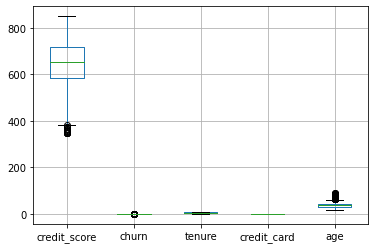

In [11]:
#creating a boxplot to see attributes with outliers
data.boxplot(column = ['credit_score','churn','tenure','credit_card','age'])

<AxesSubplot:>

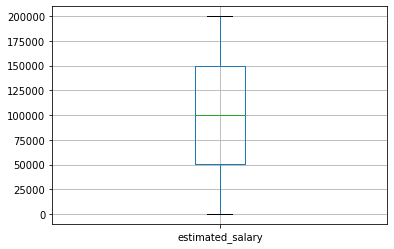

In [12]:
data.boxplot(column = 'estimated_salary')

* age has a number of values outside the upper boundary(oultiers)

In [13]:
data[data["age"]>=65]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
58,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,15589975,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,15789669,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9736,15644103,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9747,15775761,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9753,15705174,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9894,15704795,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [14]:
data["estimated_salary"].value_counts(ascending = True)

109145.20    1
77789.01     1
1557.82      1
117202.19    1
195333.98    1
            ..
158043.11    1
103792.53    1
170968.99    1
155061.97    1
24924.92     2
Name: estimated_salary, Length: 9999, dtype: int64

In [15]:
data.insert(12, "Income_Level", " ")

In [16]:
for i in range(0, len(data['estimated_salary']), 1):
    if data['estimated_salary'].iloc[i] >= 150000:
        data["Income_Level"].iloc[i] = 'High'
    elif data['estimated_salary'].iloc[i] >= 100000:
         data["Income_Level"].iloc[i] = 'Medium'
    else:
        data['Income_Level'].iloc[i] = 'Low'

In [17]:
data["Income_Level"].value_counts()

Low       4990
Medium    2555
High      2455
Name: Income_Level, dtype: int64

## Credit score analysis

###### What effects do credits have on client churn_rate:
 * high credit score can indicate that a business has a strong credit history and is able to manage its debts effectively. 
  * a high credit score can be an indicator of a financially stable and responsible business, regardless of whether or not it offers services on credit.


In [18]:
#credit scores range from 300 to 850
# 800 and above is considered excellent 
# 700 and above -- good
# 500 and above -- moderate
# 500 and below --- not good

In [19]:
data["credit_score"].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: credit_score, Length: 460, dtype: int64

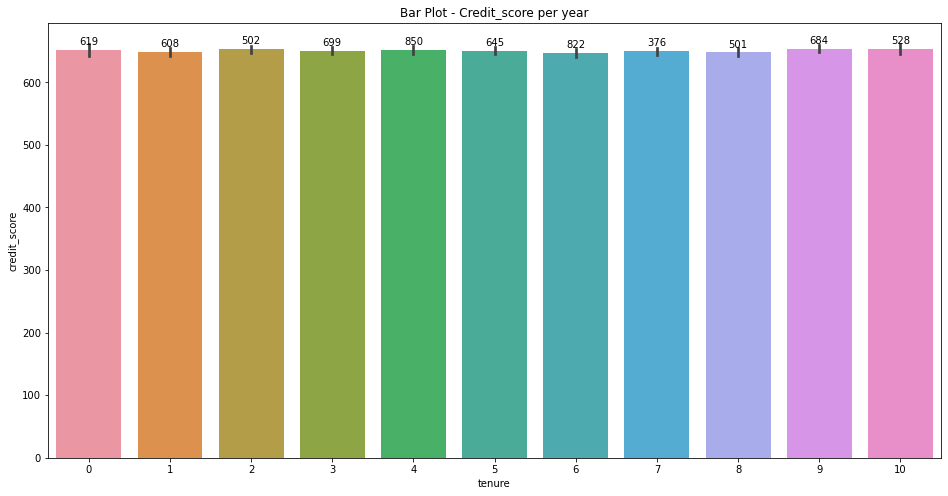

In [14]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="tenure",y="credit_score", data=df) 
ax.set_title("Bar Plot - Credit_score per year")
#Annotate the bars with value to have better idea
for p, v in zip(ax.patches, df['credit_score']):
    
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, v, 
    ha='center', va='bottom') 
plt.show()

In [21]:
data.insert(2, "Score", " ")

In [22]:
for i in range(0, len(data['credit_score']), 1):
    if data['credit_score'].iloc[i] >= 800:
        data["Score"].iloc[i] = 'Excellent'
    elif data['credit_score'].iloc[i] >= 700:
         data["Score"].iloc[i] = 'Good'
    elif data['credit_score'].iloc[i] >= 600:
         data["Score"].iloc[i] = 'moderate'
    elif data['credit_score'].iloc[i] >= 500:
         data["Score"].iloc[i] = 'Not pleasing'
    else:
        data['Score'].iloc[i] = 'Bad'

In [23]:
data['Score'].value_counts()

moderate        3818
Good            2493
Not pleasing    2402
Excellent        655
Bad              632
Name: Score, dtype: int64

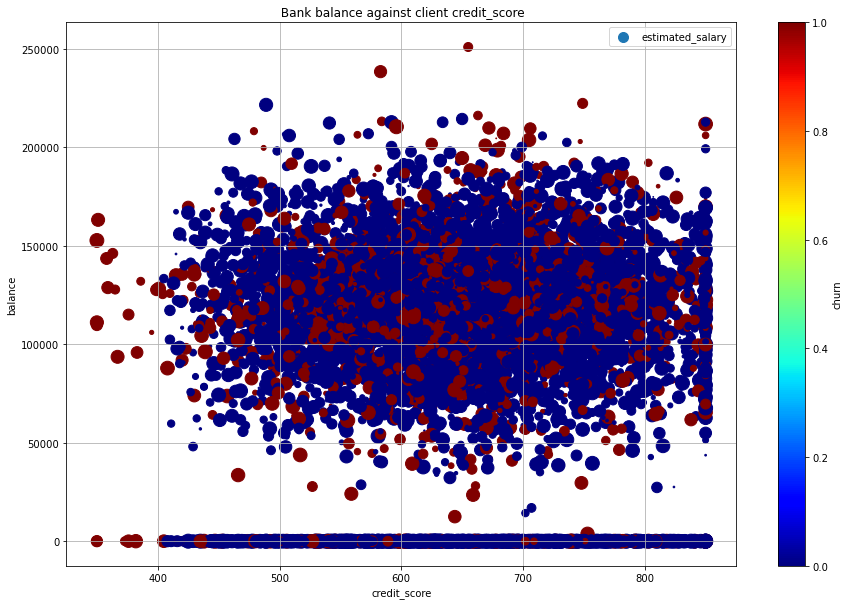

In [24]:
data.plot(kind="scatter", x="credit_score", y="balance", grid=True,title = " Bank balance against client credit_score",
 s=data["estimated_salary"] / 1000, label="estimated_salary",
 c="churn", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(15, 10))
plt.show()

 * the radius of each circle the estimates salary of each client/customer-- here the circles ain't that big or small which means most of the bank clients' salaries high enough to keep the bank in business
 - Blue is the most dominant color which shows that low/no churn rate 
 - red represent clients that have high churn rate 
 *  which means these clients can stop accesing/using the bank services anytime

In [25]:
data.columns

Index(['customer_id', 'credit_score', 'Score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'Income_Level'],
      dtype='object')

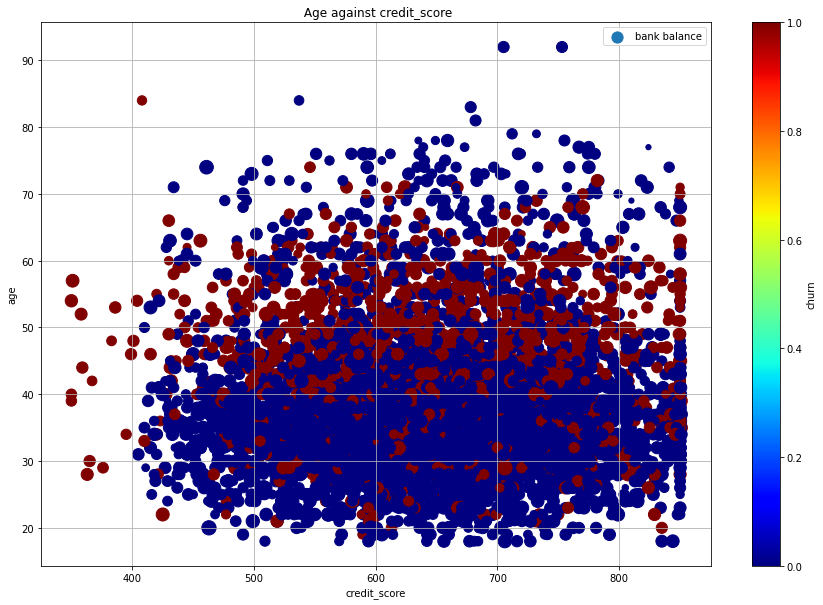

In [26]:
data.plot(kind="scatter", x="credit_score", y="age", grid=True,title = " Age against credit_score",
 s=data["balance"] / 1000, label="bank balance",
 c="churn", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(15, 10))
plt.show()

* Insight:

     **most churners are between the age 40 to 60**
     * the bank tends is mainly targeting clients below the age of 50
     
     *  Most of the elderly people tend to have credit score below 800 m** 

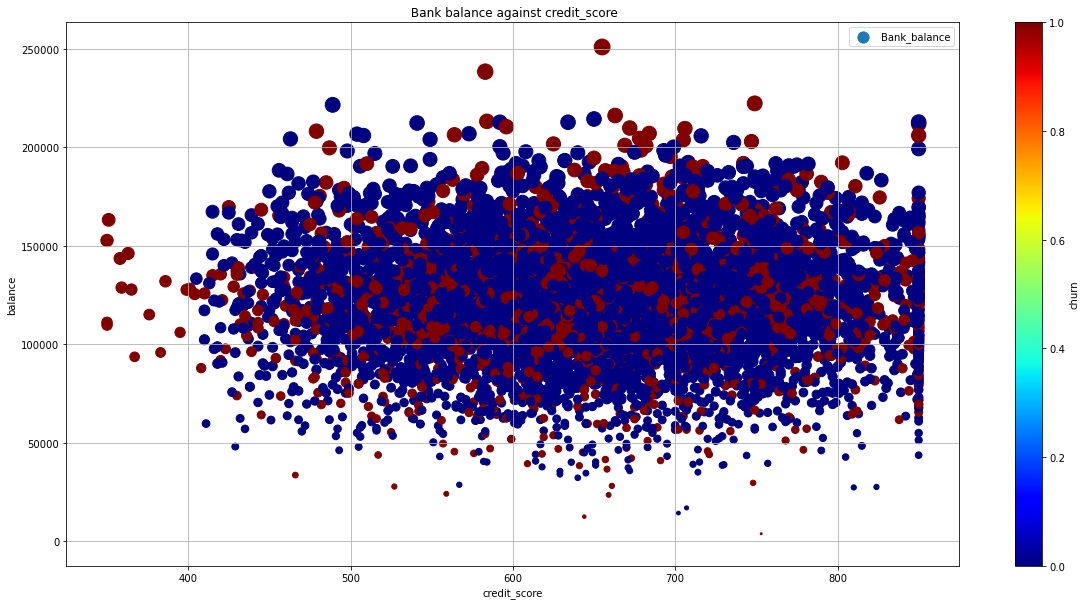

In [27]:
data.plot(kind="scatter", x="credit_score", y="balance", grid=True,title = " Bank balance against credit_score",
    s=data["balance"] / 1000, label="Bank_balance",
 c="churn", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(20,10))
plt.show()

* Insights:
     * clients with small bank amounts can stay in business for quite some time
     * some of our clients with large bank amounts are churning so the bank might need to increase interest rates and other ....
     * bank balance cant garantee client's credit score

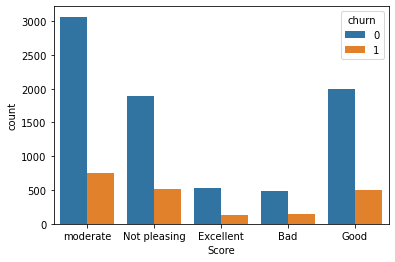

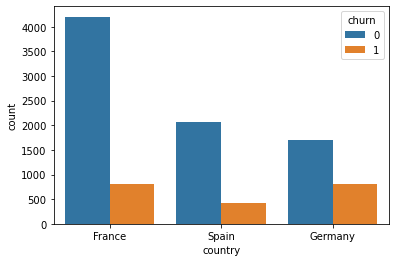

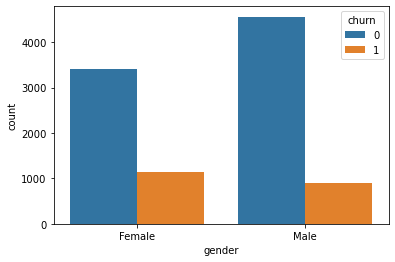

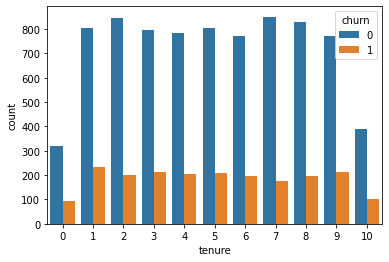

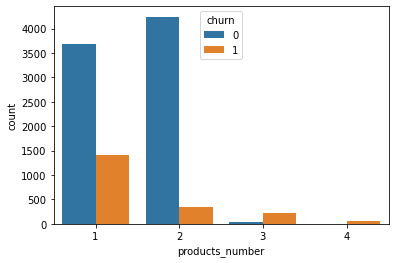

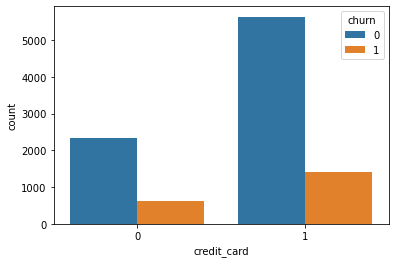

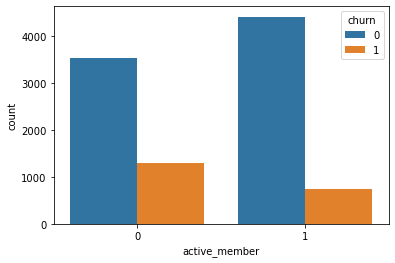

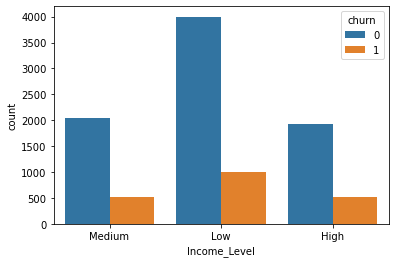

In [28]:
#COUNTING THE FREQUENCY OF EACH ATTRIBUTES
for i, predictor in enumerate(data.drop(columns=[ 'customer_id','age',  'credit_score',"balance",
       'estimated_salary', 'churn'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='churn')

#### Insights
* high churn rate is frequent to customers with moderate and good credit score
* churn rate is slightly high in german and most of them are females
* credit card users with high churn rate are about 1 300 in total
*  from 1 to 9 years there seems to a even rate of churners although the posibility of non_churners rate is high though
* Low_income earners are possible churners

### Looking for at churners specifically

In [29]:
churners = data.loc[data["churn"]==1]

In [30]:
churners.shape

(2037, 14)

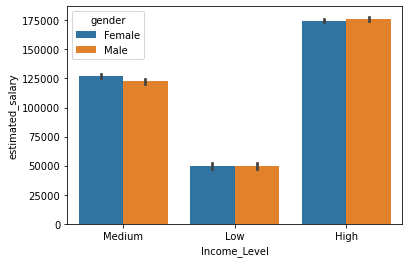

In [31]:
# Bar Plot Grouped by a Specific Feature()
ax = sns.barplot(x="Income_Level", y="estimated_salary", hue='gender', data=churners)

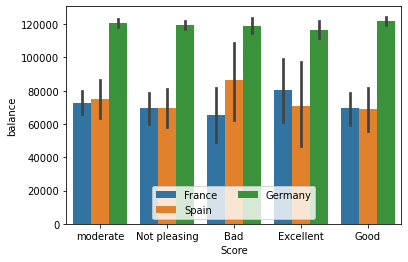

In [32]:
# Bar Plot Grouped by a Specific Feature()
ax = sns.barplot(x="Score", y="balance", hue='country', data=churners) #can also plot scatterplot, barplot and ............
ax.legend(loc='lower center',ncol=2)

##### Where to put our focus on
* Since we discovered that Clients with good and moderate scores have high churning rate
* Most of them are from germany and they are medium income earners

In [33]:
data.groupby(by = 'Score').mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
Score,,,,,,,,,,
Bad,1.569156e+07,462.925633,38.908228,5.077532,80294.231329,1.515823,0.723101,0.468354,103307.478418,0.237342
Excellent,1.569290e+07,831.383206,39.009160,4.969466,76976.407985,1.554198,0.690076,0.534351,100338.736473,0.195420
Good,1.569204e+07,741.711592,38.795026,5.048536,76614.511047,1.530686,0.709186,0.521059,100461.030233,0.198957
Not pleasing,1.568968e+07,556.435887,38.861782,4.942548,74474.081794,1.520816,0.700250,0.498751,98581.912194,0.212323
moderate,1.569057e+07,650.213986,39.029597,5.030382,76953.030629,1.534049,0.706129,0.525930,100221.869722,0.197224


## Digging deep on posible churners

In [34]:
nc= churners[data.Score.isin(['moderate', 'Good'])& (churners.Income_Level == 'Low')]

In [35]:
nc

,customer_id,credit_score,Score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Income_Level
16,15737452,653,moderate,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Low
54,15569590,601,moderate,Germany,Male,42,1,98495.72,1,1,0,40014.76,1,Low
70,15703793,738,Good,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,Low
88,15622897,646,moderate,France,Female,46,4,0.00,3,1,0,93251.42,1,Low
105,15613854,622,moderate,Spain,Female,46,4,107073.27,2,1,1,30984.59,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,15578865,632,moderate,Germany,Female,50,5,107959.39,1,1,1,6985.34,1,Low
9947,15732202,615,moderate,France,Male,34,1,83503.11,2,1,1,73124.53,1,Low
9962,15594612,702,Good,Spain,Male,44,9,0.00,1,0,0,59207.41,1,Low
9997,15584532,709,Good,France,Female,36,7,0.00,1,0,1,42085.58,1,Low


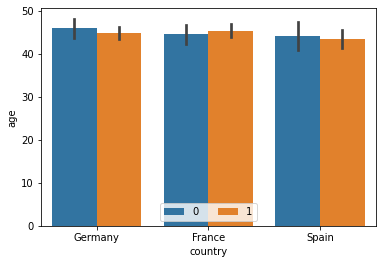

In [36]:
# Bar Plot Grouped by a Specific Feature()
ax = sns.barplot(x="country", y="age", hue='credit_card', data=nc) #can also plot scatterplot, barplot and ............
ax.legend(loc='lower center',ncol=2)

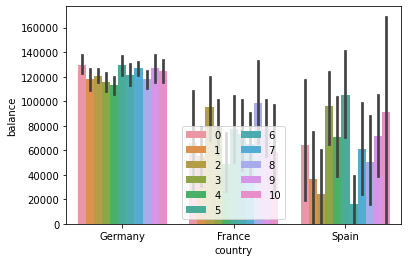

In [37]:
# Bar Plot Grouped by a Specific Feature()
ax = sns.barplot(x="country", y="balance", hue='tenure', data=nc) #can also plot scatterplot, barplot and ............
ax.legend(loc='lower center',ncol=2)

* most churners are between 40 and 50

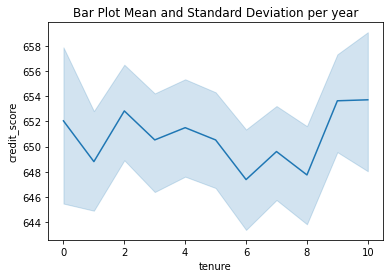

In [38]:
ax = sns.lineplot(x="tenure",y="credit_score", data=data, 
ci=80)
ax.set_title("Bar Plot Mean and Standard Deviation per year")
plt.show()

import altair as alt

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
 alt.Y('Wellbeing (0-10):Q', bin=True)
)
circles = heatmap.mark_point().encode(
 alt.ColorValue('lightgray'),
 alt.Size('count()',
 legend=alt.Legend(title='Records in Selection')
 )
)
heatmap + circles

In [39]:
data.head()

,customer_id,credit_score,Score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Income_Level
0,15634602,619,moderate,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
1,15647311,608,moderate,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium
2,15619304,502,Not pleasing,France,Female,42,8,159660.80,3,1,0,113931.57,1,Medium
3,15701354,699,moderate,France,Female,39,1,0.00,2,0,0,93826.63,0,Low
4,15737888,850,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Low


In [40]:
corr = data.corr()

In [41]:
cor_target= abs(corr['churn'])
relevant_features= cor_target[cor_target> 0.0]
relevant_features

customer_id         0.006248
credit_score        0.027094
age                 0.285323
tenure              0.014001
balance             0.118533
products_number     0.047820
credit_card         0.007138
active_member       0.156128
estimated_salary    0.012097
churn               1.000000
Name: churn, dtype: float64

In [42]:
bank_dummies = pd.get_dummies(data)
bank_dummies.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,...,Score_Not pleasing,Score_moderate,country_France,country_Germany,country_Spain,gender_Female,gender_Male,Income_Level_High,Income_Level_Low,Income_Level_Medium
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,0,1,1,0,0,1,0,0,0,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,0,1,0,0,1,1,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,1,0,1,0,0,1,0,0,0,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,0,1,1,0,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,1,1,0,0,1,0


*  Relationship between estimated_salary and balance

Text(0.5, 1.0, 'bank balance by churn')

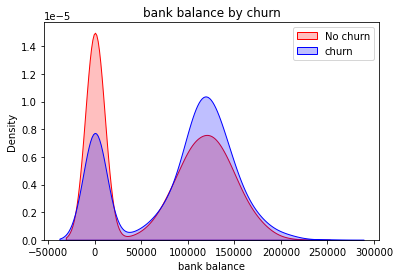

In [44]:
Mth = sns.kdeplot(bank_dummies.balance[(bank_dummies["churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(bank_dummies.balance[(bank_dummies["churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('bank balance')
Mth.set_title('bank balance by churn')

**Insight:** Churn is high when balance is at $0$ and inbetween $50000$ and $150000$

Text(0.5, 1.0, 'age by churn')

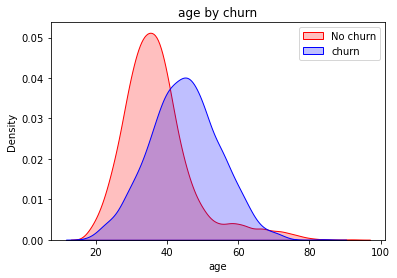

In [45]:
Mth = sns.kdeplot(bank_dummies.age[(bank_dummies["churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(bank_dummies.age[(bank_dummies["churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('age')
Mth.set_title('age by churn')

**Insight:** Churn is high as age increases

Text(0.5, 1.0, 'estimated_salary by churn')

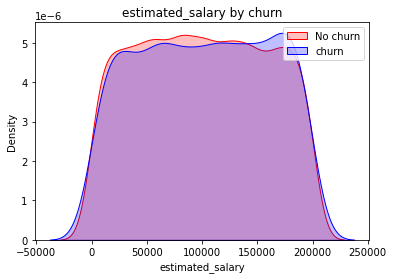

In [46]:
Mth = sns.kdeplot(bank_dummies.estimated_salary[(bank_dummies["churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(bank_dummies.estimated_salary[(bank_dummies["churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('estimated_salary')
Mth.set_title('estimated_salary by churn')

**Insight:** Higher churn for customers with estimated_salary between 0 and 200000

Text(0.5, 1.0, 'credit_score by churn')

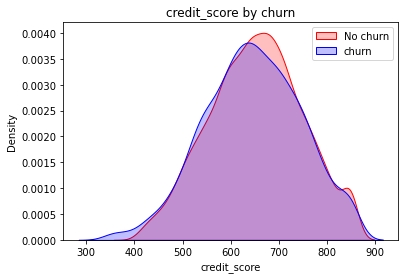

In [47]:
Mth = sns.kdeplot(bank_dummies.credit_score[(bank_dummies["churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(bank_dummies.credit_score[(bank_dummies["churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('credit_score')
Mth.set_title('credit_score by churn')

**Insight:** Churn is high as credit_score increases but tends to drop as credit_score gets too high

*  Build a corelation of all predictors with 'Churn' 


<AxesSubplot:>

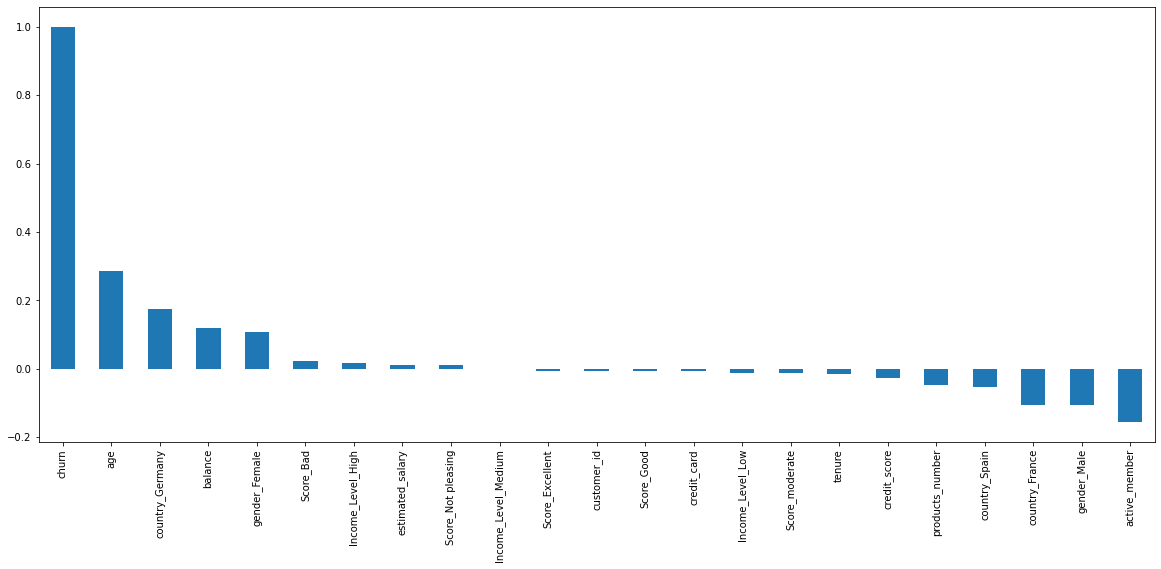

In [48]:
plt.figure(figsize=(20,8))
bank_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **
* $ High$ churn is  seen in cases of $age$,**those living in** $country_Germany $, $ balance$ , gender_female

**LOW** Churn is seen in case of **credit_score**, **product number**,**those living in spain and france**, **gender_male** and **active_member**

Factors like **estimated_salary**, **credit_card** and **tenure** have alomost **NO** impact on Churn

# Bivariate Analysis

In [49]:
data["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [50]:
new_df1_target0=data.loc[data["churn"]==0]
new_df1_target1=data.loc[data["churn"]==1]

In [51]:
churners = new_df1_target1

In [52]:
churners.head()

,customer_id,credit_score,Score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Income_Level
0,15634602,619,moderate,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium
2,15619304,502,Not pleasing,France,Female,42,8,159660.80,3,1,0,113931.57,1,Medium
5,15574012,645,moderate,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Medium
7,15656148,376,Bad,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Medium
16,15737452,653,moderate,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Low


In [53]:
churners.describe(include =object)

,Score,country,gender,Income_Level
count,2037,2037,2037,2037
unique,5,3,2,3
top,moderate,Germany,Female,Low
freq,753,814,1139,993


In [54]:
#most the churners are females 
#country france and geramny

In [55]:

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

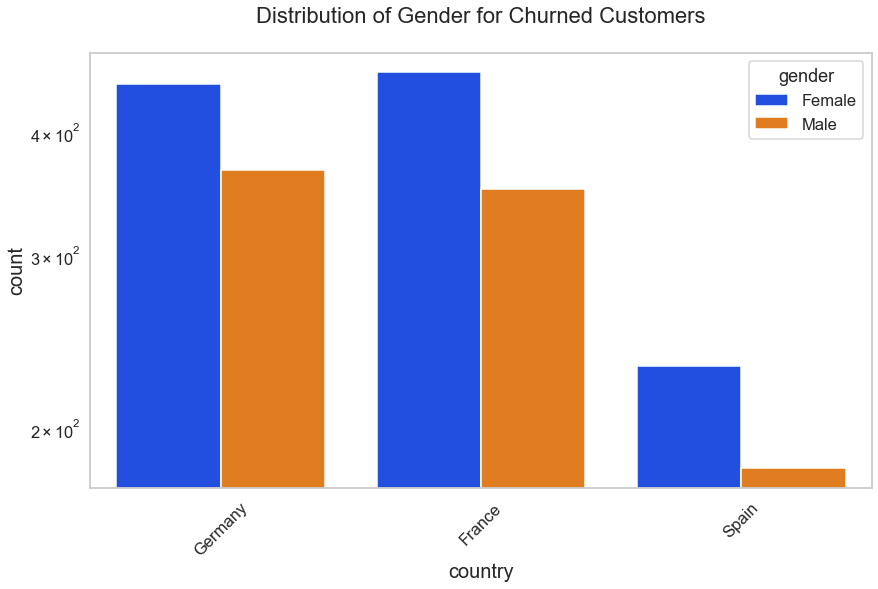

In [56]:
uniplot(new_df1_target1,col='country',title='Distribution of Gender for Churned Customers',hue='gender')

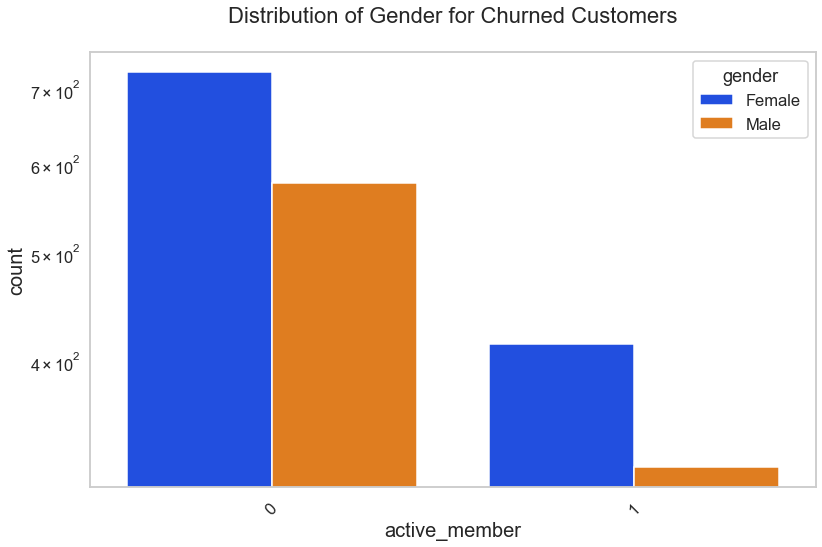

In [57]:
uniplot(new_df1_target1,col='active_member',title='Distribution of Gender for Churned Customers',hue='gender')

* females are the most non_active members and probably high churners

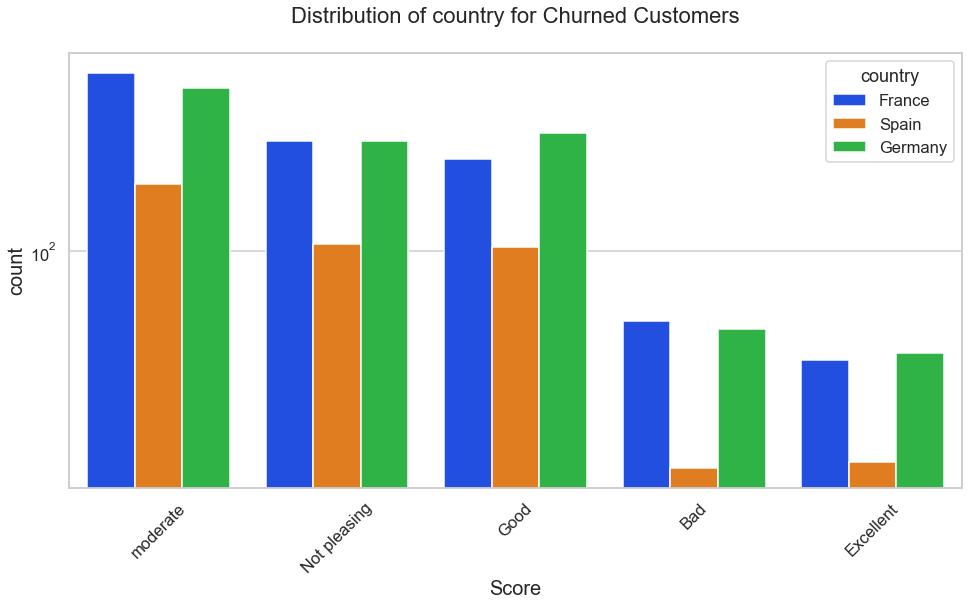

In [58]:
uniplot(new_df1_target1,col='Score',title='Distribution of country for Churned Customers',hue='country')

* insight : 
    * most customers in germany and france have high credit score

## Estimated Salary

* Calculating zscore to Find Outliers in $estimated_salary$,$balance$,$credit_score$

In [5]:
df1 = data.copy()

In [6]:
columns_to_drop = ['customer_id','country', 'gender', 'age', 'tenure',
        'products_number', 'credit_card', 'active_member', 'churn']
df1.drop(columns_to_drop, axis = 1, inplace= True)


* Calculate the mean and standard deviation of the estimated_salary column and assign them to new columns in df1

* calculate zscore 

* use the abs function to calculate the absolute value

In [7]:
df1['mean'] = df1["estimated_salary"].mean()
df1['std'] = df1["estimated_salary"].std()

df1['zscore'] = (df1["estimated_salary"] - df1['mean'])/df1['std']

df1['zscore_abs'] = abs(df1['zscore'])

In [8]:
df1.sort_values(by="zscore_abs", ascending=False).head(100)

,credit_score,balance,estimated_salary,mean,std,zscore,zscore_abs
2092,655,250898.09,81054.00,76485.889288,62397.405202,2.795184,2.795184
3280,583,238387.56,147964.99,76485.889288,62397.405202,2.594686,2.594686
8733,749,222267.63,101108.85,76485.889288,62397.405202,2.336343,2.336343
3588,489,221532.80,171867.08,76485.889288,62397.405202,2.324566,2.324566
6717,663,216109.88,74176.71,76485.889288,62397.405202,2.237657,2.237657
...,...,...,...,...,...,...,...
8175,561,186788.96,73286.80,76485.889288,62397.405202,1.767751,1.767751
3727,781,186558.55,175071.29,76485.889288,62397.405202,1.764058,1.764058
9292,461,186445.31,196767.83,76485.889288,62397.405202,1.762243,1.762243
3373,644,186347.97,92809.73,76485.889288,62397.405202,1.760683,1.760683


*  filter the high and low values using the zscore:

In [9]:
anamlous_df_high = df1.sort_values(by="zscore", ascending=False).head(10)

anamlous_df_low = df1.sort_values(by="zscore", ascending=True).head(10)

* then vizualize them

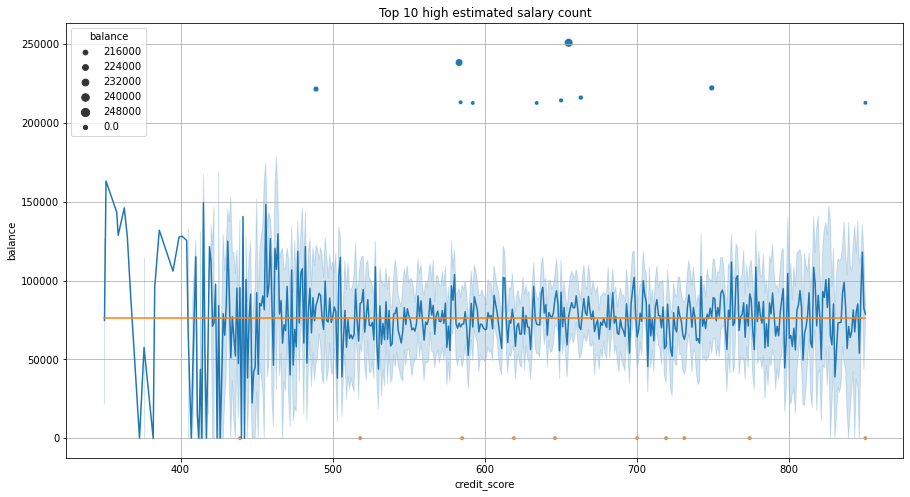

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.grid=True
plt.title("Top 10 high estimated salary count")
ax = sns.lineplot(x="credit_score", y="estimated_salary", data=df1)
ax = sns.scatterplot(x="credit_score",y="estimated_salary", data=anamlous_df_high, size="estimated_salary")
ax = sns.lineplot(x="credit_score", y="mean", data=df1)

ax = sns.scatterplot(x="credit_score",y="estimated_salary", data=anamlous_df_low, 
size="estimated_salary")
ax.grid()

 

###### As we can see, the outliers in the dataset are represented by the orange dots and the blue dots.


### Pivot Tables and crosstabs
* balance
* churn
* estimated salary

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [59]:
#country with highest and lowest population
pd.crosstab(index = data['country'],
           columns = data['gender'],
           dropna = True)

gender,Female,Male
country,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [60]:
#probabilty of 2 things happening at the same time
pd.crosstab(index = data['country'],
           columns = data['credit_card'],
            normalize = True,
           dropna = True)

credit_card,0,1
country,,
France,0.1471,0.3543
Germany,0.0718,0.1791
Spain,0.0756,0.1721


In [61]:
#countries and gender with highest bank balance
pd.pivot_table(data, index = ['country',"gender"], values ="balance", aggfunc="max")


balance
country gender           
France  Female  238387.56
        Male    212692.97
Germany Female  206868.78
        Male    214346.96
Spain   Female  216109.88
        Male    250898.09

In [62]:
pd.pivot_table(data, index = ['country',"gender"], values ="age", aggfunc= "sum")

age
country gender        
France  Female   87668
        Male    105430
Germany Female   47904
        Male     51883
Spain   Female   42688
        Male     53645

In [63]:
pd.crosstab(index = data['country'],
           columns = data['age'],
           dropna = True)

age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
country,,,,,,,,,,,,,,,,,,,,,
France,11,11,21,31,45,45,73,69,113,116,...,2,3,2,3,1,0,1,1,0,2
Germany,6,8,6,11,11,27,27,47,43,44,...,1,0,0,1,0,1,1,0,0,0
Spain,5,8,13,11,28,27,32,38,44,49,...,2,1,1,0,0,0,0,0,1,0


* Conditional Probability is the probability of an event (A), given that another event (B) has already occurred.
* Given the country, what is the probability of different active_member value

In [64]:
pd.crosstab(index = data['country'],
           columns = data['active_member'],
            margins = True,
            normalize = 'columns',
           dropna = True)

active_member,0,1,All
country,,,
France,0.499691,0.503009,0.5014
Germany,0.260054,0.242283,0.2509
Spain,0.240256,0.254708,0.2477


**How much (on average) do churned users  make each month?**

In [65]:
data[data["churn"] == 1]["estimated_salary"].mean()

101465.6775306824


**What is the maximum salary of loyal users (`Churn == 0`) who do not use credit cards?**


In [66]:
data[(data["churn"] == 0) & (data["credit_card"] == 0)]["estimated_salary"].max()

199992.48

In [67]:
pd.pivot_table(data, index = ['country',"gender"], values ='estimated_salary')

estimated_salary
country gender                  
France  Female      99564.252755
        Male       100174.252495
Germany Female     102446.424124
        Male        99905.033959
Spain   Female     100734.107475
        Male        98425.687680

In [68]:
data["estimated_salary"].value_counts()

24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
            ..
37674.47     1
158043.11    1
103792.53    1
182266.01    1
155061.97    1
Name: estimated_salary, Length: 9999, dtype: int64

In [69]:
data.columns

Index(['customer_id', 'credit_score', 'Score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'Income_Level'],
      dtype='object')

## Scatter plot
* scatter plots are mostly used to detect outliers here we going to detect outliers and the churn rate

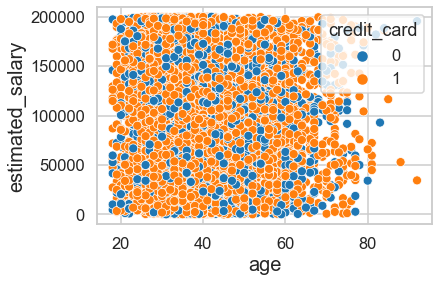

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='age', y='estimated_salary', 
hue='credit_card', data=data)
plt.show()

* insight:
* firstly it looks like most of our customers are credit_card  users
* most the users between the age of 20 and 6o have estimated_salary less than $ 200000 $(which happens to be the highest from all our customers) and they are using credit cards

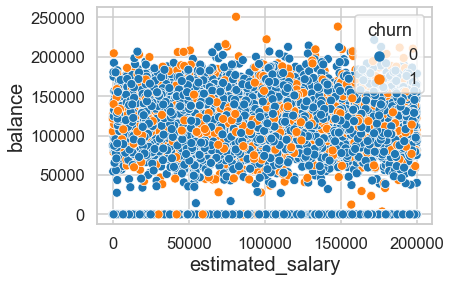

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='estimated_salary', y='balance', 
hue='churn', data=data)
plt.show()

* normaly clients with very low are most churners but her seems their is a even spread of churners over their estimated salary
* Insight :
      * 

In [72]:
bank_dummies.to_csv('bank_churn.csv')
data.to_csv('bank_churn1.csv')

In [73]:
bank_dummies.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,...,Score_Not pleasing,Score_moderate,country_France,country_Germany,country_Spain,gender_Female,gender_Male,Income_Level_High,Income_Level_Low,Income_Level_Medium
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,0,1,1,0,0,1,0,0,0,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,0,1,0,0,1,1,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,1,0,1,0,0,1,0,0,0,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,0,1,1,0,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,1,1,0,0,1,0
